# 3. String

## 1. 문자열

### 컴퓨터의 문자 표현
문자에 대응되는 숫자를 정해놓고 이것을 메모리에 저장
- 영어 : 대소문자 합쳐서 52가지 -> 6비트(64가지)로 모두 표현 가능(코드 체계)
    - ex. 000000 : 'a', 000001 : 'b'
 
#### 네트워크의 발전으로 인한 코드체계 문제점
네트워크가 발전하면서 서로간에 정보를 주고 받을 때 정보를 달리 해석한다는 문제 발생

#### 코드체계 표준안 : ASCII
ASCII(American Standart Code for Information Interchange) : 문자 인코딩 표준
- 7bit 인코딩으로 128문자를 표현
- 33개의 출력 불가능한 제어 문자 / 공백을 비롯한 95개의 출력 가능한 문자
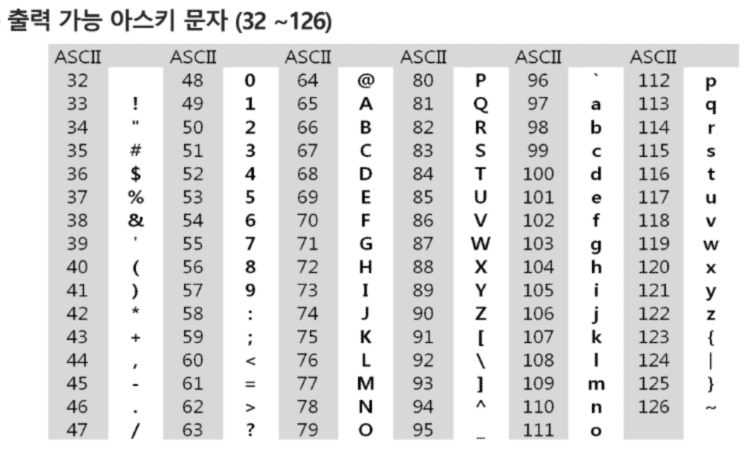

#### 확장 아스키
표준 문자 이외의 악센트 문자, 도형 문자, 특수 문자, 특수 기호 등 부가적인 문자를 128개 추가할 수 있게 하는 부호
- 1B 내의 8bit를 모두 사용
- 프로그램이나 컴퓨터 또는 프린터가 그것을 해독할 수 있도록 설계되어 있어야 올바르게 해독 가능
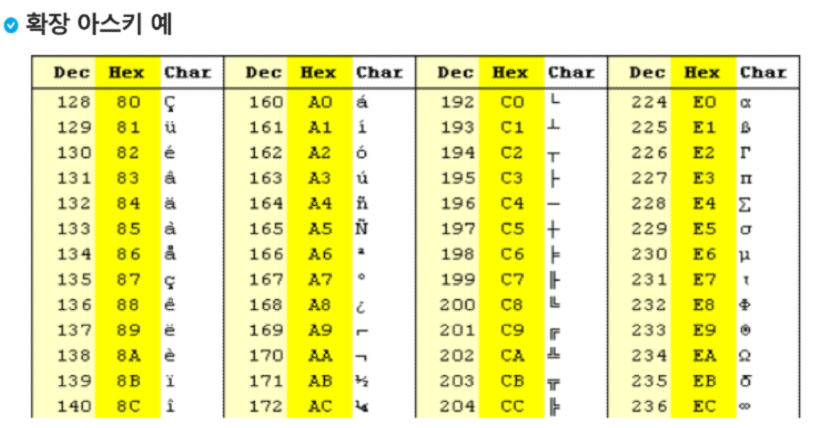

#### 한글 코드체계
각 국가들은 자국의 문자를 표현하기 위해 코드체계를 독자적으로 만들어서 사용
- 한국 : 조합형 / 완성형

#### 자국 코드체계의 문제점
자국의 코드체계를 타 국가가 가지고 있지 않을 경우 정보를 잘못 해석
- 유니코드의 탄생


### 유니코드
유니코드(UniCode) : 전 세계의 모든 문자를 다루도록 설계된 표준 문자 전산 처리 방식
- Character Set으로 분류됨
1. UCS-2(Universal Character Set 2)
2. UCS-4(Universal Character Set 4)
- 유니코드를 저장하는 변수의 크기 정의
- 바이트 순서에 대한 표준화 실패
    - 파일 인식 단계에서 해당 파일이 UCS-2, UCS-4인지 인식하고, 각 경우를 구분해서 모두 다르게 구현해야 함
- 유니 코드의 적당한 외부 인코딩의 필요성

#### 유니코드 인코딩
UTF(Unicode Transformation Format)
- 파일에 저장/전송 시 사용
- UTF-8(in web) : Min - 8bit / Max - 32bit(1Byte * 4)
- UTF-16(in windows, java) : Min - 16bit / Max - 32bit(2Byte * 2)
- UTF-32(in unix) : Min - 32bit / Max - 32bit(4Byte * 1)

파이썬 인코딩
- 2.X 버전 : ASCII -> #-*- coding: utf-8 -*- (첫 줄에 명시)
- 3.X 버전 : 유니코드 UTF-8 : 생략 가능

## 2. 문자열의 분류
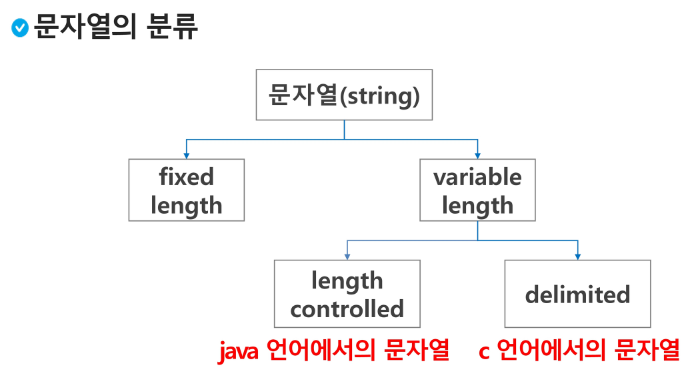

### 파이썬에서의 문자열 처리
파이썬에는 char 타입이 존재하지 않는다
- 텍스트 데이터의 취급 방법이 통일 되어 있음
- 문자열은 시퀀스 자료형으로 분류(인덱싱, 슬라이싱 연산 사용 가능)
- 문자열 클래스에서 제공되는 메서드 : replace(), split(), isalpha(), find(), ...
- 요소값 변경 불가능(immutable)

#### string 처리의 차이점
- C : 아스키 코드로 저장
- java : 유니코드(UTF-16, 2byte)로 저장
- python : 유니코드(UTF-8)로 저장

## 3. 패턴 매칭

### 패턴 매칭에 사용되는 알고리즘들
- 고지식한 패턴 검색 알고리즘
- 카프-라빈 알고리즘
- KMP 알고리즘
- 보이어-무어 알고리즘

#### 패턴 매칭에 사용되는 용어
- target : 검색 대상
- pattern : 검색 패턴
- lps : longest prefix search
- prefix / surfix 
- skip table :

```python

### 고지식한 방식(Brute Force)
본문의 문자열을 처음부터 끝까지 차례대로 순회하면서 패턴 내의 문자들을 일일이 비교하는 방식으로 동작
- 시간 복잡도 : O(MN)
- 최악의 경우 텍스트의 모든 위치에서 패턴을 비교해야 함
```python
# 찾을 패턴
p = 'is'
# 전체 텍스트
t = 'this is a book!'

def BruteForce(p, t):
    M = len(p)
    N = len(t)
    i = 0
    j = 0
    while j < M and i < N:
        if t[i] != p[j]:
            i -= j
            j -= 1
        i += 1
        j += 1
    if j == M:
        return i - M
    else:
        return -1
```

### KMP 알고리즘
불일치가 발생한 텍스트 스트링의 앞 부분에 어떤 문자가 있는지를 미리 알고 있으므로, 불일치가 발생한 앞 부분에 대해 다시 비교하지 않고 매칭을 수행하는 알고리즘
- 패턴을 전처리하여 배열 next[M]을 구해서 잘못된 시작을 최소화
    - next[M] : 불잋리가 발생했을 경우 이동할 다음 위치
- 시간 복잡도 : O(M+N)
```python
    lps = [0] * (M+1)
    # proprocessing
    j = 0
    lps[0] = -1
    for i in range(1, M):
        lps[i] = j
        if p[i] == p[j]"
            j += 1
        else:
            j = 0
    lps[M] = j
    print(lps)

### 보이어-무어 알고리즘
오른쪽에서 왼쪽으로 비교
- 대부분의 상용 소프트웨어에서 채택하고 있는 알고리즘
- 패턴에 오른쪽 끝에 있는 문자가 불일치하고 이 문자가 패턴 내에 존재하지 않는 경우, 이동 거리는 무려 패턴의 길이만큼이 된다
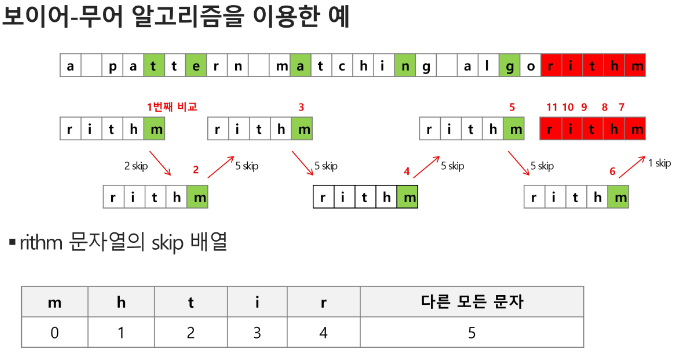
- 앞의 두 매칭 알고리즘들의 공통점 텍스트 문자열의 문자를 적어도 한 번씩 흝는다
    - 최선의 경우에도 Big-Omega(n)
- 보이어-무어는 텍스트 문자를 다 보지 않아도 된다
- 시간 복잡도 : O(MN)
    - 일반적으로 O(N)보다 시간이 덜 든다

In [10]:
# Target : 검색 대상
# Pattern : 검색 패턴
target = "SSAFY 10th Let's Go!"
pattern = "Go"

# 고지식한 검색 알고리즘
def BruteForce(p, t):
    N = len(t) # 검색 대상의 길이
    M = len(p) # 검색 패턴의 길이
    # 인덱스를 직접 조절
    i = 0 # t의 인덱스
    j = 0 # p의 인덱스

    # 종료조건 1 : j == M 즉, 타겟의 인덱스가 타겟 내에서 끝까지 돌 경우
    # 종료조건 2 : i == N 즉, 타겟을 찾지 못하고 끝까지 돌았을 경우
    while j < M and i < N:
        # 패턴과 다른 곳을 발견했을 때
        if t[i] != p[j]: # j만큼 이동했을 때 틀린 곳 발견
            i = i - j
            j -= 1 # j 초기화(패턴과 일치하는 문자열 발견 시 j에도 1을 더해주기 때문에)
        # 문제가 없어서 인덱스를 증가시킬 때
        i += 1
        j += 1
    # while문을 빠져나왔을 때
    # 1. 찾았을 때
    if j == M:
        return i - M # 해당 패턴의 인덱스 반환
    # 2. 끝까지 다 돌았음에도 못찾았을 때
    else:
        return -1
A = 'banana'
B = 'bana'
print(BruteForce(B, A))

0


In [ ]:
# kmp 전처리
target2 = 'abcdabeeababcdabcef'
p = 'eeba'
def pre_process(t):
    # 타겟의 패턴을 찾기 위한 배열
    lps = [0] * len(t)
    j = 0 # lps를 만들기 위한 prefix에 대한 idx
    '''
    i : 패턴에서 지나가는 idx
    j : 지나가고 있는 idx와 패턴의 앞 부분과 같은 곳에 대한 idx
    '''
    for i in range(1, len(t)):
        # i, j 인덱스의 값이 같을 경우, lps의 i번 idx 값으로 j+1을 삽입
        if t[i] == t[j]:
            # 첫 번째 패턴이 발생되는 순간을 기입
            lps[i] = j + 1
            j += 1
        else:
            j = 0
            if t[i] == t[j]:
                lps[i] = j + 1
                j += 1
    # skip table 반환
    return lps

# ㅏㅡㅔ
def KMP(t, p):
    # skip table
    lps = pre_process(t)
    
    i = 0 # target을 순회하는 idx
    j = 0 # pattern을 순회하는 idx
    position = -1 # 재할돵되지 않을 경우 반환되는 실패 값
    while i < len(t):
        # 같을 경우
        if p[j] == t[i]:
            j += 1
            i += 1
        # 다를 경우
        else:
            # 1. j가 0이 아닐 경우(중간부터 다를 경우) 
            # i는 유지 / j만 이동 후 탐색
            if j != 0:
                # brute force와 달라지는 부분(lps 사용)
                j = lps[j-1] 

            # 2. j가 0일 경우(시작부터 다를 경우) 
            # i를 한 칸 이동하여 처음부터 탐색(이미 j는 초기화가 되어있음)
            else:
                i += 1
        if j == len(p):
            position = i - j
            break            
    return position
target2 = 'abcdabeeababcdabcef'
p = 'eeba'
print(KMP(target2, p))

In [ ]:
# 보이어-모어

# skip table
# 1. 보이어-무어 패턴 검색의 장점 : 검색하는 패턴의 길이만큼 스킵 가능
# 마지막 idx를 제외할 것 -> pattern의 마지막 인덱스를 검사했을 때 
# 일치하지 않는다면 len(pattern)만큼 스킵할 것
# 마지막에 나오는 char는 없는 것으로 취급
def pre_process(t):
    M = len(t)
    # skip table을 딕셔너리로 구성
    skip_t = dict()
    for i in range(M-1): # 기록되지 않는 문자는 get() 메서드의 디폴트 활용
        skip_t[t[i]] = M-(1+i)
    return skip_t

def boyer_moore(t, p):
    skip_table = pre_process(t)
    M = len(p)
    
    i = 0 # 타겟 idx
    while i <= len(t) - M:
        # 뒤에서부터 탐색
        j = M-1
        # 비교 시작 위치(현재 위치 + M)
        k = i + (M-1)
        # 탐색할 j idx가 남아있고, 타겟과 패턴이 같으면 1씩 줄여가며 비교
        while j >= 0 and p[j] == t[k]:
            i -= 1
            j -=1
        # 뒤에서부터 탐색 
        # j가 -1이 되면 매칭 성공
        if j == -1:
            position = i
            return position
        # skip할 곳(while 종료 후 위의 if문에도 걸리지 않은 경우)
        # 타겟의 i + M - 1번 idx(없을 경우 M만큼)
        # i를 비교해서 탐색을  시작할 문자(t[i+M-1])
        # skip table에서 해당 문자를 찾아, 해당 문자의 skip 값 만큼 스킵
        i += skip_table.get(t[i+M-1], M)
    # 못 찾은 경우
    return -1

## 4. 시저 암호

### 시저 암호
줄리어스 시저가 사용한 암호
- 평문에서 사용되고 있는 알파벳을 일정한 문자 수만큼 평행이동 시킴으로써 암호화

#### 단일 치환 암호
문자 변환표를 이용한 암호화보다 훨씬 강력한 암호화 기법
- 단순 카이사르 암호화보다 훨씬 강력한 암호화 기법
- 복호화를 위해 모든 키의 조합이 필요
- key space = 26!

#### 문자열 압축
Run-length encoding 알고리즘
- 같은 값이 몇 번 반복되는가를 나타냄으로써 압축
- 이미지 파일 포맷 중 BMP 파일포맷의 압축 방법

#### 허프만 코딩 알고리즘
조금 더 효율적이고 일반적인 알고리즘